# Microsoft Movie Start-up Analysis

By Victor Mwatu
***
***

<div>
<center><img src="images/movie.jpg" height="300"/></center>
</div>

## Overview
***
Microsoft corporation intends to venture into movie production business. The statistical analysis below determined the best course of action to take in terms of which kinds of moveis are most popular.



## Business Problem
***
Microsoft corporation wants to start a movie production studio. This is a data driven analysis on the movies that are top rated by online voters to determine the best movies to produce. Customer satisfaction is the main goal of any business because it directly affects the profitability of a business. Here we shall try to find patterns that relate to customer satisfaction.



<div>
<center><img src="images/movieBiz.jpg" height="300"/></center>
</div>

## Data Understanding
***
The data is from two of the most popular movie rating and analysis websites, 'IMDB', 'The MoviesDB', and 'Rotten Tomatoes' have been chosen for their popularity and comprehensive data. The data contains movie ratings, genres, and release date which are the target data for this study but also includes other data fields as well. The success of movies will be rated by customer satisfaction represented here as movie ratings.

In [6]:
# Import standard packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data fields selected from the IMDB SQL database was from different tables with fields that were most relevant to this study.

In [7]:
# Connect to database and read tsv file
conn = sqlite3.connect('data/im.db')
imdb_data1 = pd.read_sql('''SELECT movie_basics.*, movie_ratings.averagerating, movie_ratings.numvotes, movie_akas.language 
                                FROM movie_basics
                                JOIN movie_ratings USING(movie_id)
                                JOIN movie_akas     USING(movie_id)
;''', conn)
#Write to csv a more managable size
imdb_data1.to_csv('data/imdbData.csv')
imdb_data = pd.read_csv('data/imdbData.csv')
#Select required data and convert it to Pandas Dataframe
tmdb_data = pd.read_csv('data/tmdb.movies.csv')
rotten_tomatoes_data = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
tmdb_data.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
#Preview 'IMDB' database dataset
imdb_data

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,language
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN
1,1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN
2,2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,hi
3,3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,hi
4,4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,hi
...,...,...,...,...,...,...,...,...,...,...
261801,261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,NaN
261802,261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,en
261803,261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,NaN
261804,261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,ml


In [9]:
imdb_data['language'].value_counts().head(10)

language
en     19262
tr      3779
bg      3528
fr      3475
he      2332
sv       940
cmn      626
fa       460
hi       282
yue      268
Name: count, dtype: int64

In [10]:
#Preview 'Rotten Tomatoes' dataset

rotten_tomatoes_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [11]:
#Information about 'IMDB' dataset

print(imdb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       261806 non-null  int64  
 1   movie_id         261806 non-null  object 
 2   primary_title    261806 non-null  object 
 3   original_title   261806 non-null  object 
 4   start_year       261806 non-null  int64  
 5   runtime_minutes  250553 non-null  float64
 6   genres           260621 non-null  object 
 7   averagerating    261806 non-null  float64
 8   numvotes         261806 non-null  int64  
 9   language         37080 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.0+ MB
None


In [12]:
#Information about 'The MoviesDB' dataset

print(tmdb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


In [13]:
#Information about 'Rotten Tomatoes' dataset

rotten_tomatoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Data Preparation
***
### Data Cleaning and Modelling

The 'The MoviesDB' data was clean and did not need any more cleaning. On the othe hand the 'IMDB' dataframe had a lot of missing values but those could be dropped without much concequence because of the size of the dataframe. There also seems to be some duplicates in the 'IMDB' dataframe. These are going to be removed.


In [14]:
#Drop 'IMDB' and 'The MovieDB' dataframe empty vlues and unwanted columns
imdb_data = imdb_data.dropna()
tmdb_data =tmdb_data.drop(columns=['Unnamed: 0', 'id'])
tmdb_data.loc[tmdb_data['vote_average'] == 0, 'vote_average'] = 5

#Remove duplicates
imdb_data = imdb_data.drop_duplicates(subset=['primary_title'])
duplicates = imdb_data[imdb_data.duplicated(subset='primary_title')]
imdb_data.info()
imdb_data.head()
duplicates.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 19415 entries, 2 to 261804
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19415 non-null  int64  
 1   movie_id         19415 non-null  object 
 2   primary_title    19415 non-null  object 
 3   original_title   19415 non-null  object 
 4   start_year       19415 non-null  int64  
 5   runtime_minutes  19415 non-null  float64
 6   genres           19415 non-null  object 
 7   averagerating    19415 non-null  float64
 8   numvotes         19415 non-null  int64  
 9   language         19415 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.6+ MB


,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,language


The 'Box office' column in the 'Rotten Tomatoes' dataframe has a lot of missing values but they are going to be dropped nevertheless beause the data from that column is what is of interest, no matter how small due to its direct implication to profit. But first the required columns are selected.

In [15]:
#Drop 'Rotten Tomatoes' dataframe empty values

rotten_tomatoes_data = rotten_tomatoes_data.dropna()

Next we are going to change the 'box office' column of 'Rotten Tomatoes' dataset to a numerical value by dropping the dollar sign and the comma, then changing type to number.

In [16]:
#Convert 'Rotten Tomatoes' dataframe column 'box_office' to numeric for analysis

rotten_tomatoes_data['box_office'] = rotten_tomatoes_data['box_office'].map(lambda x: x.replace(',', ''))


C:\Users\AMwatu\AppData\Local\Temp\ipykernel_1684\215561838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_data['box_office'] = rotten_tomatoes_data['box_office'].map(lambda x: x.replace(',', ''))


In [17]:
rotten_tomatoes_data['box_office'].astype('Int64')

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office, Length: 235, dtype: Int64


More data cleaning below. The separators are standadized and a new column 'genre' is created for 'The MoveieDB' database based on genre information from their API.

In [18]:
di = {'Action':28, 'Adventure':12, 'Animation' :16, 'Comedy': 35, 'Crime':80, 'Documentary': 99, 'Drama':18, 'Family': 10751, 'Fantasy': 14, 'History':36, 'Horror':27, 'Music':10402, 'Mystery':9648, 'Romance':10749, 'Science Fiction':878, 'TV Movie':10770, 'Thriller':53, 'War':10752, 'Western':37}

## Analysis
***


First the most common statistical analysis is done on all our dataframes to determine obvious patterns.


In [19]:
tmdb_data.describe()

,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000
mean,3.130912,6.016925,194.224837
std,4.355229,1.803797,960.961095
min,0.600000,0.500000,1.000000
25%,0.600000,5.000000,2.000000
50%,1.374000,6.000000,5.000000
75%,3.694000,7.000000,28.000000
max,80.773000,10.000000,22186.000000


In [20]:
imdb_data.describe()

,Unnamed: 0,start_year,runtime_minutes,averagerating,numvotes
count,19415.000000,19415.000000,19415.000000,19415.000000,1.941500e+04
mean,141566.441875,2014.133917,98.957301,6.251908,1.218370e+04
std,75164.720563,2.603654,21.943060,1.167887,5.782900e+04
min,2.000000,2010.000000,6.000000,1.000000,5.000000e+00
25%,77511.500000,2012.000000,87.000000,5.600000,5.200000e+01
50%,143308.000000,2014.000000,96.000000,6.400000,2.730000e+02
75%,208002.000000,2016.000000,109.000000,7.000000,1.760000e+03
max,261804.000000,2019.000000,720.000000,10.000000,1.841066e+06


In [21]:
rotten_tomatoes_data.describe()

,id
count,235.000000
mean,1010.217021
std,578.522979
min,3.000000
25%,488.500000
50%,1044.000000
75%,1526.000000
max,1985.000000


### Correlation Between Movie Ratings And Other Data Points

#### Ratings and movie length

There appears to be a correlation between movie lengths and ratings. Movies that are longer seem to have a more positive rating than shorter ones.

Text(0.5, 0, 'Ratings')

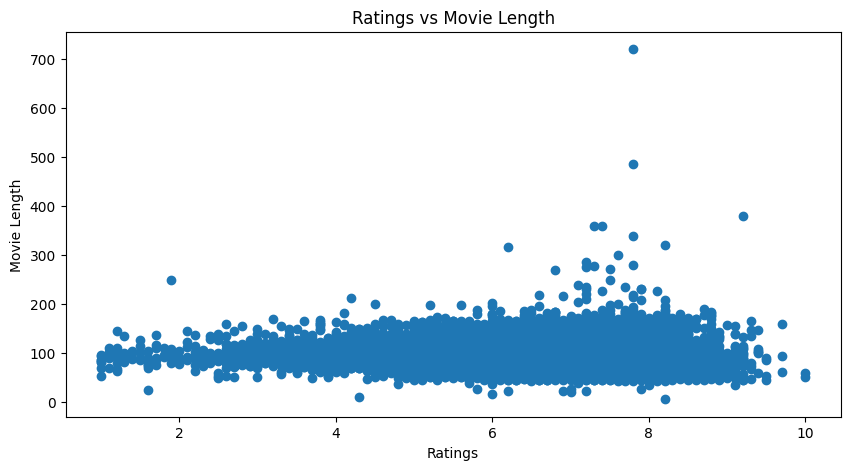

In [22]:
avg_imdb = imdb_data['averagerating'] 
lenght_imdb = imdb_data['runtime_minutes']

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(avg_imdb, lenght_imdb)

ax.set_title('Ratings vs Movie Length')
ax.set_ylabel('Movie Length')
ax.set_xlabel('Ratings')


In [23]:
avg_imdb = imdb_data['averagerating'] 
lenght_imdb = imdb_data['runtime_minutes']

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(avg_imdb, lenght_imdb)

ax.set_title('Ratings vs Movie Length')
ax.set_ylabel('Movie Length')
ax.set_xlabel('Ratings')




#### Genres Popularity

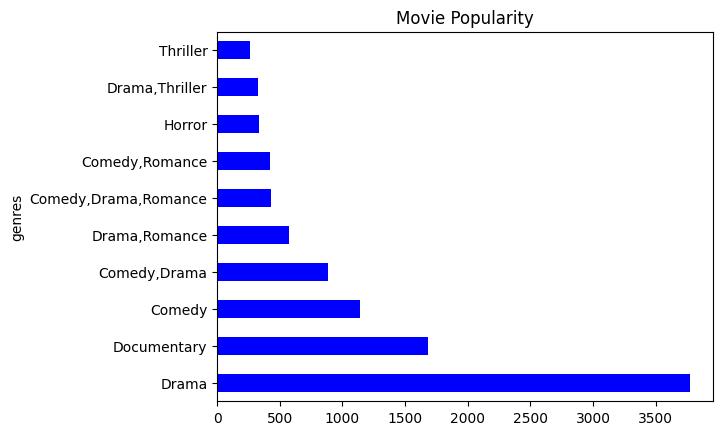

In [ ]:
imdb_data['genres'].value_counts().head(10).plot.barh(color='blue', y='Popularyty', title='Movie Popularity IMDB');

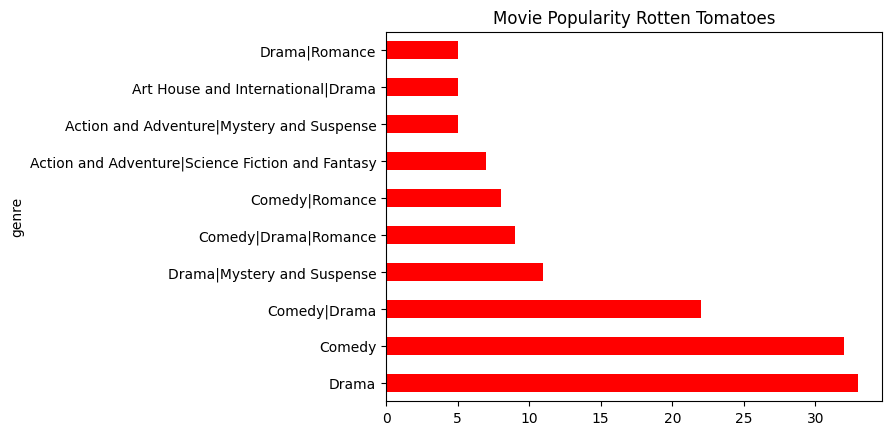

In [ ]:
rotten_tomatoes_data['genre'].value_counts().head(10).plot.barh(color='red',title='Movie Popularity Rotten Tomatoes');

#### Ratings and language

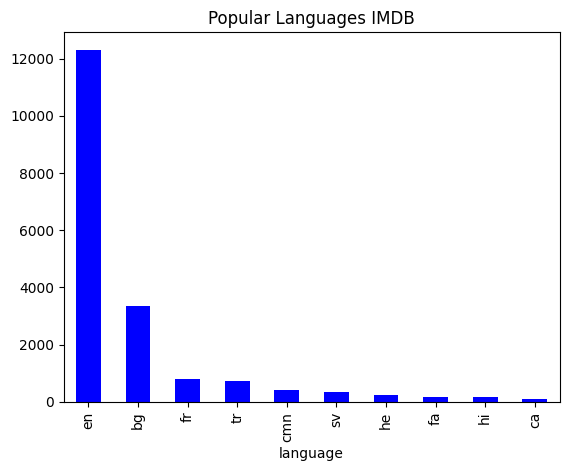

In [ ]:
imdb_data['language'].value_counts().head(10).plot.bar(color='blue', title='Popular Languages IMDB');


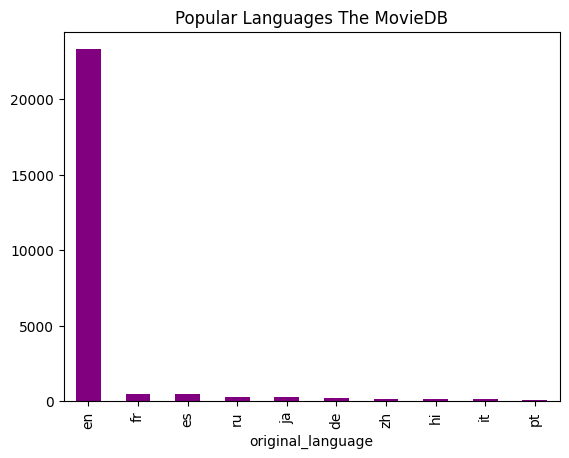

In [ ]:
tmdb_data['original_language'].value_counts().head(10).plot.bar(color='purple', title='Popular Languages The MovieDB');

### Box Office Sales Per Season

C:\Users\AMwatu\AppData\Local\Temp\ipykernel_16040\3898665275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_data['release_month'] = rotten_tomatoes_data['theater_date'].str[:4].value_counts()


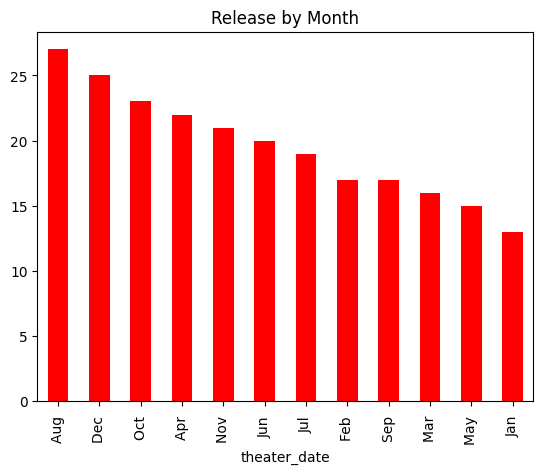

In [ ]:
rt_release_month = rotten_tomatoes_data['theater_date'].str[:4].value_counts()
rotten_tomatoes_data['release_month'] = rotten_tomatoes_data['theater_date'].str[:4].value_counts()
rt_release_month.plot.bar(color='red', title='Release by Month');

## Conclusions

From the data analysis done the following inferences were drawn:

1. Movie lengh should be ideally between 50 to 200 minutes. Movies with this length have the highest ratings.

2. The most produced movie genre is Drama and Comedy which seem largest market. 

3. Most movies are of English language.

Future analysis:

Future analysis is recomended to establish correlations between these variables and others. 